This notebook applies feature selection to training sets. The idea behind it is to reduce computation time for further analysis.

# **Import libraries and data**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
sns.set_style("whitegrid")

In [ ]:
data = pd.read_table("/sequence_ogt_topt_features2.tab")
data.head()

,seq_id,seq_OGT,seq_TEMP,length,A,C,D,E,F,G,...,g_distance_21,g_distance_22,g_distance_23,g_distance_24,g_distance_25,g_distance_26,g_distance_27,g_distance_28,g_distance_29,g_distance_30
0,P43408,70.0,85,192.0,0.057292,0.005208,0.067708,0.093750,0.015625,0.072917,...,0.034347,0.032415,0.032451,0.032834,0.029978,0.030860,0.031718,0.030500,0.031564,0.030533
1,Q89GR3,30.0,26,334.0,0.128743,0.023952,0.065868,0.059880,0.053892,0.068862,...,0.034243,0.032303,0.031779,0.031747,0.034163,0.031319,0.032579,0.030562,0.034217,0.031188
2,Q60352,37.0,80,260.0,0.046154,0.003846,0.080769,0.046154,0.038462,0.076923,...,0.030898,0.032849,0.032089,0.031334,0.033246,0.032201,0.031122,0.029493,0.028413,0.031119
3,Q97X08,80.0,74,334.0,0.044910,0.000000,0.020958,0.029940,0.047904,0.059880,...,0.032492,0.031342,0.031397,0.032859,0.032442,0.032565,0.032662,0.033901,0.030358,0.032277
4,Q7B8C4,37.0,30,250.0,0.048000,0.016000,0.044000,0.108000,0.044000,0.076000,...,0.031849,0.033423,0.029825,0.032686,0.031649,0.033085,0.029445,0.031416,0.030575,0.030584


In [ ]:
X = data.drop(['seq_id','seq_OGT','seq_TEMP','length'], axis=1)
y = data['seq_TEMP']

In [ ]:
# Split dataset to training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0)

In [ ]:
data.shape

(2917, 10299)

<Axes: xlabel='seq_TEMP', ylabel='Count'>

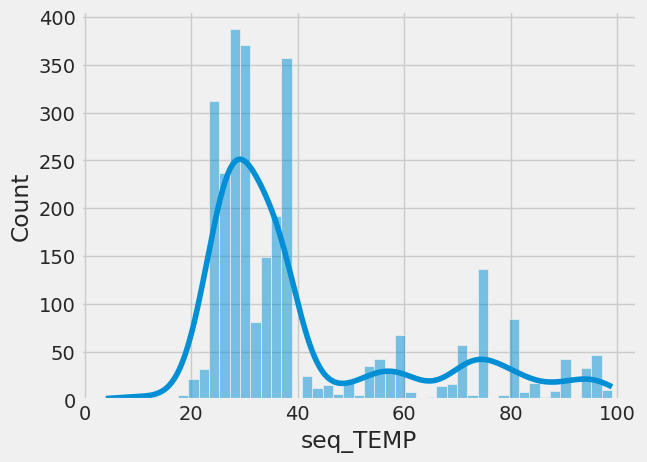

In [ ]:
sns.histplot(data['seq_TEMP'], kde=True)

# **Feature Selection**

Feature selection covers Variation Threshold and Information Gain methods. The best method for the data set chosen is Information Gain for 500 observations, as it was derived from testing the performances of random forests models. 

In [ ]:
#Random forests model for original data with all features
clf = RandomForestRegressor(random_state=0).fit(X_train, y_train)

In [ ]:
print('Accuracy of Decision Tree regressor on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree regressor on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree regressor on training set: 0.95
Accuracy of Decision Tree regressor on test set: 0.69


## **Variation Threshold**

In [ ]:
# Scale the data before calculation
scaler = MinMaxScaler()
X_train_sc = scaler.fit_transform(X_train)

In [ ]:
X_train_sc.shape

(2041, 10295)

In [ ]:
thresholder = VarianceThreshold(threshold=.015)
X_train_vt = thresholder.fit_transform(X_train_sc)
X_train_vt.shape

(2041, 1178)

In [ ]:
#Extracting all constant columns using get support function of our filter
constant_columns = [column for column in X_train.columns
                    if column not in X_train.columns[thresholder.get_support()]]

In [ ]:
#remove the columns from the test set 
X_test = X_test.drop(constant_columns,axis=1)
X_test.shape

(876, 1178)

In [ ]:
X_test_sc = scaler.fit_transform(X_test)

In [ ]:
X_train_vt=pd.DataFrame(X_train_vt)
X_test_sc=pd.DataFrame(X_test_sc)

In [ ]:
X_train_vt.head()

,0,1,2,3,4,5,6,7,8,9,...,1168,1169,1170,1171,1172,1173,1174,1175,1176,1177
0,0.563993,0.346648,0.419361,0.225519,0.094098,0.376821,0.485695,0.142964,0.202036,0.604609,...,0.295666,0.323433,0.366632,0.334303,0.442829,0.497554,0.191443,0.584150,0.455182,0.773409
1,0.318911,0.558786,0.253941,0.369009,0.358160,0.452631,0.323520,0.349817,0.247179,0.226021,...,0.326007,0.458323,0.366975,0.467161,0.433554,0.332888,0.381040,0.230343,0.619774,0.615352
2,0.162900,0.422313,0.201406,0.632982,0.405055,0.328769,0.313611,0.323688,0.152478,0.278852,...,0.210766,0.264309,0.490883,0.521557,0.251300,0.476045,0.361660,0.467638,0.440358,0.488865
3,0.267510,0.613069,0.257003,0.260708,0.269113,0.444179,0.148828,0.075098,0.194569,0.767528,...,0.442826,0.107450,0.426367,0.377108,0.528191,0.556443,0.745684,0.556128,0.545686,0.609458
4,0.272671,0.511021,0.244285,0.422571,0.263789,0.335560,0.427924,0.327167,0.670408,0.328610,...,0.436425,0.482588,0.466462,0.503743,0.620835,0.414739,0.518962,0.412252,0.470281,0.542495


In [ ]:
X_test_sc.head()

,0,1,2,3,4,5,6,7,8,9,...,1168,1169,1170,1171,1172,1173,1174,1175,1176,1177
0,0.580312,0.390830,0.216376,0.189922,0.098309,0.490913,0.343329,0.160277,0.201066,0.593447,...,0.263528,0.163070,0.492677,0.500141,0.535656,0.562106,0.661359,0.841804,0.575974,0.578570
1,0.544438,0.131578,0.161477,0.350000,0.256198,0.208763,0.219617,0.426044,0.400852,0.135795,...,0.282305,0.321621,0.588160,0.358995,0.374899,0.707226,0.548890,0.661862,0.322715,0.607812
2,0.393309,0.395425,0.286492,0.395161,0.181818,0.381951,0.519525,0.355711,0.376512,0.421623,...,0.411018,0.454834,0.434897,0.362200,0.763116,0.448292,0.400656,0.610450,0.878139,0.679829
3,0.185179,0.347770,0.163183,0.663987,0.371529,0.418196,0.414283,0.434344,0.166801,0.312199,...,0.272033,0.324191,0.610401,0.511823,0.640916,0.527171,0.623838,0.636904,0.607186,0.625979
4,0.214279,0.462357,0.221253,0.343324,0.614318,0.417425,0.394952,0.345534,0.367507,0.244210,...,0.449209,0.237116,0.530598,0.433537,0.638573,0.298422,0.577621,0.578527,0.578453,0.638923


In [ ]:
#Random forests
clf = RandomForestRegressor(random_state=0).fit(X_train_vt, y_train)

In [ ]:
print('Accuracy of Decision Tree regressor on training set: {:.2f}'
     .format(clf.score(X_train_vt, y_train)))
print('Accuracy of Decision Tree regressor on test set: {:.2f}'
     .format(clf.score(X_test_sc, y_test)))

Accuracy of Decision Tree regressor on training set: 0.95
Accuracy of Decision Tree regressor on test set: 0.62


Did not improve the performance as the result for model with all features was 0.69.

## **Information Gain**

In [ ]:
# mutual info classif calculates the mutual information between two variables, aka Information Gain
# select K best chooses the k top features based on the feature selection method provided
# select top 500 features
selector = SelectKBest(mutual_info_classif, k=500)
selector.fit_transform(X_train, y_train)
# Get columns to keep and create new dataframe with those only
cols_idxs = selector.get_support(indices=True)
X_train_ig = X_train.iloc[:,cols_idxs]

In [ ]:
X_train_ig.shape

(2041, 500)

In [ ]:
 X_train_ig.head()

,A,C,E,I,K,L,N,Q,R,S,...,Normalized van der Waals Volume-T2332,Polarity-T1331,Polarizability-T2332,Charge-T1221,Charge-T1331,Solvent accessibility-T1221,Hydrophobicity_CASG920101-G1D100,Hydrophobicity_FASG890101-G1D100,Normalized van der Waals Volume-G1D100,Charge-G2D100
1,0.128743,0.023952,0.059880,0.041916,0.017964,0.083832,0.020958,0.020958,0.083832,0.065868,...,0.156156,0.213213,0.189189,0.150150,0.048048,0.237237,100.0000,100.000000,100.000000,100.000000
384,0.076923,0.008547,0.094017,0.065527,0.068376,0.096866,0.051282,0.025641,0.031339,0.065527,...,0.180000,0.262857,0.200000,0.165714,0.034286,0.265714,99.7151,98.005698,100.000000,100.000000
530,0.043937,0.001757,0.072056,0.108963,0.077329,0.075571,0.047452,0.015817,0.038664,0.068541,...,0.209507,0.278169,0.228873,0.181338,0.026408,0.288732,100.0000,100.000000,98.242531,100.000000
588,0.066055,0.009174,0.102752,0.047706,0.051376,0.095413,0.011009,0.020183,0.106422,0.060550,...,0.200368,0.257353,0.250000,0.213235,0.053309,0.321691,100.0000,100.000000,99.816514,99.816514
1032,0.067146,0.007194,0.086331,0.074341,0.050360,0.076739,0.047962,0.069544,0.045564,0.069544,...,0.197115,0.204327,0.209135,0.149038,0.028846,0.257212,100.0000,100.000000,100.000000,100.000000


In [ ]:
#select features for X_test based on IG resutls
X_test_ig = X_test.iloc[:,cols_idxs]
X_test_ig.head()

,A,C,E,I,K,L,N,Q,R,S,...,Normalized van der Waals Volume-T2332,Polarity-T1331,Polarizability-T2332,Charge-T1221,Charge-T1331,Solvent accessibility-T1221,Hydrophobicity_CASG920101-G1D100,Hydrophobicity_FASG890101-G1D100,Normalized van der Waals Volume-G1D100,Charge-G2D100
380,0.129845,0.007752,0.067829,0.027132,0.017442,0.100775,0.029070,0.019380,0.079457,0.046512,...,0.153398,0.198058,0.170874,0.151456,0.027184,0.264078,99.806202,99.612403,100.000000,100.000000
2597,0.122727,0.004545,0.027273,0.050000,0.045455,0.059091,0.077273,0.038636,0.018182,0.065909,...,0.116173,0.182232,0.125285,0.100228,0.013667,0.223235,100.000000,96.136364,100.000000,100.000000
1774,0.092742,0.008065,0.068548,0.056452,0.032258,0.084677,0.064516,0.036290,0.056452,0.036290,...,0.178138,0.238866,0.194332,0.145749,0.016194,0.287449,100.000000,100.000000,97.580645,100.000000
841,0.051447,0.001608,0.061093,0.094855,0.065916,0.090032,0.078778,0.016077,0.041801,0.069132,...,0.228663,0.278583,0.252818,0.157810,0.019324,0.273752,99.678457,99.196141,98.713826,100.000000
22,0.057221,0.013624,0.079019,0.049046,0.108992,0.089918,0.062670,0.035422,0.032698,0.073569,...,0.207650,0.267760,0.226776,0.169399,0.049180,0.251366,100.000000,100.000000,99.182561,99.182561


In [ ]:
X_test_ig.shape

(876, 500)

In [ ]:
#Random forests
clf = RandomForestRegressor(random_state=0).fit(X_train_ig, y_train)

In [ ]:
print('Accuracy of Decision Tree regressor on training set: {:.2f}'
     .format(clf.score(X_train_ig, y_train)))
print('Accuracy of Decision Tree regressor on test set: {:.2f}'
     .format(clf.score(X_test_ig, y_test)))

Accuracy of Decision Tree regressor on training set: 0.95
Accuracy of Decision Tree regressor on test set: 0.70


Slighly improved the performance as the result for model with all features was 0.69. 
Therefore, the data sets based on 500 features selected by Information Gain are used for further analysis.